<a href="https://colab.research.google.com/github/Alchemist98/Kaggle_Projects/blob/master/makeup_or_nomakeup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
get_ipython().system_raw("unrar x train.rar")
get_ipython().system_raw("unrar x test.rar")

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator,load_img
import os
from PIL import Image
import re
import pandas as pd

In [0]:
TRAIN_FOLDER = '/content/train'

In [0]:
TEST_FOLDER = '/content/test'

In [0]:
train_images = []

for image in os.listdir(TRAIN_FOLDER):
  train_images.append(image)

In [0]:
#train_images

In [151]:
TEST_FOLDER

'/content/test'

In [0]:
test_images = []

for image in os.listdir(TEST_FOLDER):
  test_images.append(image)


In [0]:
#test_images

In [154]:
train_images[0].split('.')[0]

'no_makeup275'

In [0]:
test_str = 'no_makeup275'

res = [re.findall(r'(\w+?)(\d+)', test_str)[0]]
#test_str[0]

In [156]:
res

[('no_makeup', '275')]

In [157]:
res[0][0]

'no_makeup'

In [0]:
labels = []

for i in range(len(train_images)):
  images = train_images[i].split('.')[0]

  res = [re.findall(r'(\w+?)(\d+)', images)[0]]

  img = res[0][0]

  if img == 'makeup':
    labels.append('Yes')
  elif img == 'no_makeup':
    labels.append('No')

In [0]:
train_df = pd.DataFrame({
    'image_type':train_images,
    'label':labels
})

In [182]:
train_df

,image_type,label
0,no_makeup275.jpeg,No
1,no_makeup507.jpeg,No
2,makeup503.jpeg,Yes
3,makeup591.jpeg,Yes
4,makeup95.jpeg,Yes
...,...,...
795,makeup691.jpeg,Yes
796,makeup339.jpeg,Yes
797,no_makeup519.jpeg,No
798,makeup410.jpeg,Yes


In [183]:
train_df['label'].value_counts()

Yes    600
No     200
Name: label, dtype: int64

In [0]:
labels1 = []

for i in range(len(test_images)):
  images = test_images[i].split('.')[0]

  res = [re.findall(r'(\w+?)(\d+)', images)[0]]

  img = res[0][0]

  if img == 'makeup':
    labels1.append('Yes')
  elif img == 'no_makeup':
    labels1.append('No')

In [0]:
test_df = pd.DataFrame({
    'image_type':test_images,
    'label':labels1
})

In [187]:
test_df.head(10)

,image_type,label
0,makeup946.jpeg,Yes
1,no_makeup637.jpeg,No
2,no_makeup173.jpeg,No
3,makeup910.jpeg,Yes
4,makeup943.jpeg,Yes
5,makeup881.jpeg,Yes
6,makeup977.jpeg,Yes
7,makeup828.jpeg,Yes
8,makeup805.jpeg,Yes
9,makeup809.jpeg,Yes


In [188]:
sample_train_imgs = list(os.walk(TRAIN_FOLDER))[0][2][:6]
sample_train_imgs

['no_makeup275.jpeg',
 'no_makeup507.jpeg',
 'makeup503.jpeg',
 'makeup591.jpeg',
 'makeup95.jpeg',
 'makeup306.jpeg']

In [0]:
sample_train_imgs = list(map(lambda x: os.path.join(TRAIN_FOLDER, x), sample_train_imgs))

In [190]:
plt.figure(figsize=(20,20))

for i in range(len(sample_train_imgs)):
  image = Image.open(sample_train_imgs[i])
  

<Figure size 1440x1440 with 0 Axes>

In [0]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=90,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=[0.9, 1.25],
    brightness_range=[0.5, 1.5]
)

test_image_generator = ImageDataGenerator(
    rescale=1./255
)

In [192]:
from sklearn.utils import shuffle 
train_df = shuffle(train_df, random_state=1)

validation_df = train_df.iloc[600:, :]
train_df = train_df.iloc[:600, :]

print(f"Final train data shape : {train_df.shape}")
train_df.sample(10)

Final train data shape : (600, 2)


,image_type,label
510,makeup540.jpeg,Yes
437,makeup74.jpeg,Yes
577,makeup453.jpeg,Yes
578,makeup284.jpeg,Yes
320,makeup771.jpeg,Yes
185,makeup309.jpeg,Yes
0,no_makeup275.jpeg,No
95,makeup76.jpeg,Yes
374,makeup233.jpeg,Yes
590,makeup337.jpeg,Yes


In [209]:
train_generator = train_image_generator.flow_from_dataframe(
    dataframe=train_df,
    directory=TRAIN_FOLDER,
    x_col='image_type',
    y_col='label',
    target_size=(224, 224),
    batch_size=8,
    seed=2020,
    shuffle=True,
    class_mode='binary'
)


validation_generator = train_image_generator.flow_from_dataframe(
    dataframe=validation_df,
    directory=TRAIN_FOLDER,
    x_col='image_type',
    y_col='label',
    target_size=(224, 224),
    batch_size=8,
    seed=2020,
    shuffle=True,
    class_mode='binary'
)

test_generator = test_image_generator.flow_from_dataframe(
    dataframe=test_df,
    directory=TEST_FOLDER,
    x_col='image_type',
    y_col='label',
    target_size=(224, 224),
    shuffle=False,
    batch_size=16,
    class_mode='binary'
)

Found 600 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


In [0]:
model = Sequential()

BASIC CNN MODEL

In [0]:
model.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'))
model.add(MaxPool2D((3,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((3,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((3,3)))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy',
             metrics=['accuracy'])

In [215]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)             

In [216]:
history = model.fit_generator(train_generator,validation_data=validation_generator,epochs=10)

Epoch 1/10


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


75/75 [==============================] - 71s 946ms/step - loss: 0.6795 - accuracy: 0.7100 - val_loss: 0.5566 - val_accuracy: 0.7850
Epoch 2/10
75/75 [==============================] - 69s 918ms/step - loss: 0.6130 - accuracy: 0.7383 - val_loss: 0.3656 - val_accuracy: 0.7850
Epoch 3/10
75/75 [==============================] - 69s 915ms/step - loss: 0.5784 - accuracy: 0.7383 - val_loss: 0.5759 - val_accuracy: 0.7850
Epoch 4/10
75/75 [==============================] - 69s 914ms/step - loss: 0.5873 - accuracy: 0.7367 - val_loss: 0.5471 - val_accuracy: 0.7850
Epoch 5/10
75/75 [==============================] - 68s 913ms/step - loss: 0.5777 - accuracy: 0.7400 - val_loss: 0.5350 - val_accuracy: 0.7850
Epoch 6/10
75/75 [==============================] - 69s 918ms/step - loss: 0.5973 - accuracy: 0.7383 - val_loss: 0.5585 - val_accuracy: 0.7850
Epoch 7/10
75/75 [==============================] - 69s 918ms/step - loss: 0.5795 - accuracy: 0.7383 - val_loss: 0.7312 - val_accuracy: 0.7850
Epoch 8/10

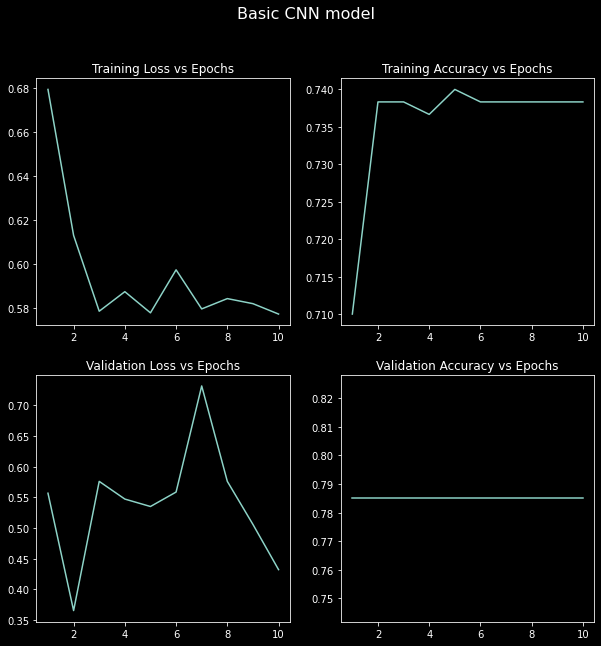

In [218]:
plt.style.use('dark_background')
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 11), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training Accuracy vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation Accuracy vs Epochs')
fig.suptitle('Basic CNN model', size=16)
plt.show()

In [0]:
test_acc = model.evaluate_generator(test_generator,500)

In [224]:
print('The testing accuracy is :',test_acc[1]*100, '%')

The testing accuracy is : 75.02598762512207 %
